# 1. Perkenalan

Nama : Sigit Pramana

Dataset : churn.csv dataset ini berisikan data customer dengan berbagai kondisi dan churn risknya

Objective : Membuat prediksi customer yang akan berhenti (churn) dari dataset yang tersedia dan untuk meminimalisir resiko seorang customer berhenti memakai produk yang mereka tawarkan.

# 2. Import Libraries

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import classification_report

# 3. Data Loading 

In [2]:
# load data

data = pd.read_csv(r"C:\Users\MyBook Z Series\Documents\Hacktiv8\P2M1\churn.csv")

In [3]:
# menampilkan 10 baris awal data

data.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [4]:
# menampilkan 10 baris terakhir data

data.tail(10).T

,37000,37001,37002,37003,37004,37005,37006,37007,37008,37009
user_id,8a0fff47b7846031,8832eec42dc0e347,b9d9761f4d367c7a,a38816e7522f5f7b,8968d0458164dda9,924e9c06f0c73817,90e22286ac0acf04,9329a6297407334a,a4403ddda8fcf9f3,93b5d0330d24fa15
age,25,38,49,42,19,36,27,20,38,36
gender,F,M,F,F,F,M,F,M,F,M
region_category,Town,Town,City,Town,Town,Town,City,NaN,City,Town
membership_category,No Membership,Silver Membership,No Membership,Basic Membership,Gold Membership,Gold Membership,Gold Membership,Gold Membership,Gold Membership,Gold Membership
joining_date,2017-01-20,2016-09-19,2017-12-12,2017-07-05,2016-07-17,2015-03-05,2017-01-15,2015-07-11,2016-05-25,2016-10-18
joined_through_referral,No,NaN,NaN,Yes,Yes,NaN,Yes,Yes,Yes,NaN
preferred_offer_types,Gift Vouchers/Coupons,Credit/Debit Card Offers,Without Offers,Gift Vouchers/Coupons,Without Offers,Credit/Debit Card Offers,Without Offers,Without Offers,Without Offers,Without Offers
medium_of_operation,Smartphone,Smartphone,Both,Both,Smartphone,NaN,Desktop,NaN,Desktop,Both
internet_option,Wi-Fi,Wi-Fi,Wi-Fi,Wi-Fi,Fiber_Optic,Fiber_Optic,Wi-Fi,Mobile_Data,Wi-Fi,Fiber_Optic


# 4. EDA (Exploratory Data Analysis)

## Churn Risk Score Compare with Other Columns

In [5]:
# melihat kolom churn_risk_score

data['churn_risk_score'].value_counts()

1    20018
0    16992
Name: churn_risk_score, dtype: int64

- Dari dataset terlihat bahwa banyak pelanggan yang mengalami churn ada 20.018, cukup banyak

Text(0.5, 1.0, 'Churn by Membership Category')

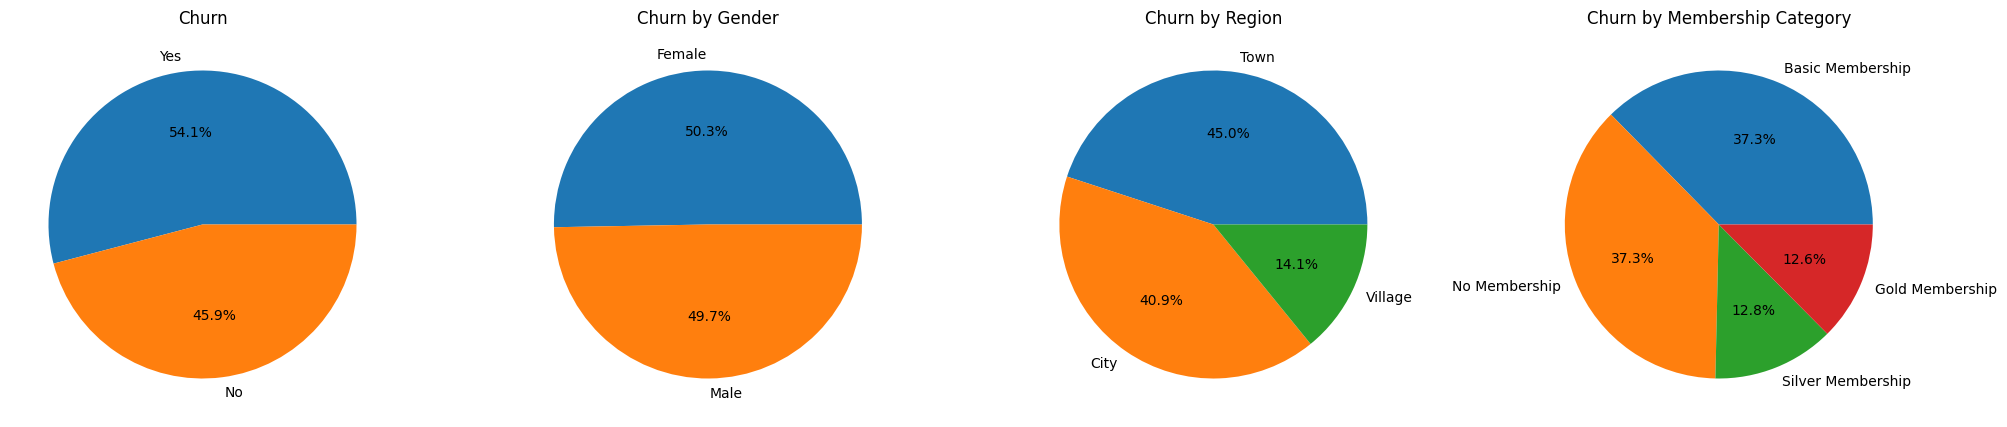

In [6]:
# membuat data pelanggan yang churn risk score = 1

data_c = data[data['churn_risk_score']==1]

# membuat pie chart untuk melihat perbandingan churn risk dengan kolom lain

plt.figure(figsize=(25,5))

plt.subplot(1, 4, 1)
plt.pie(data['churn_risk_score'].value_counts(), labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('Churn')

plt.subplot(1, 4, 2)
plt.pie(data_c['gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%')
plt.title('Churn by Gender')

plt.subplot(1, 4, 3)
plt.pie(data_c['region_category'].value_counts(), labels=['Town', 'City', 'Village'], autopct='%1.1f%%')
plt.title('Churn by Region')

plt.subplot(1, 4, 4)
plt.pie(data_c['membership_category'].value_counts(), labels=['Basic Membership', 'No Membership', 'Silver Membership','Gold Membership'], autopct='%1.1f%%')
plt.title('Churn by Membership Category') 

- Dalam chart diatas terlihat bahwa pelanggan yang churn cukup banyak yaitu 54.1%, ini sangat tidak baik untuk sebuah bisnis, dimana jenis kelamin yang churn mayoritas memiliki jumlah yang sama, tidak ada perbedaan yang signifikan. Namun pada region ini cukup banyak yang churn di Town dan City, keduanya cukup mendoninasi, dimana yang di desa malah sedikit yang mengalami churn. Untuk membershipnya sendiri kebanyakan di dominasi oleh basic membership dan no membership(belum dapat title membership).

<function matplotlib.pyplot.show(close=None, block=None)>

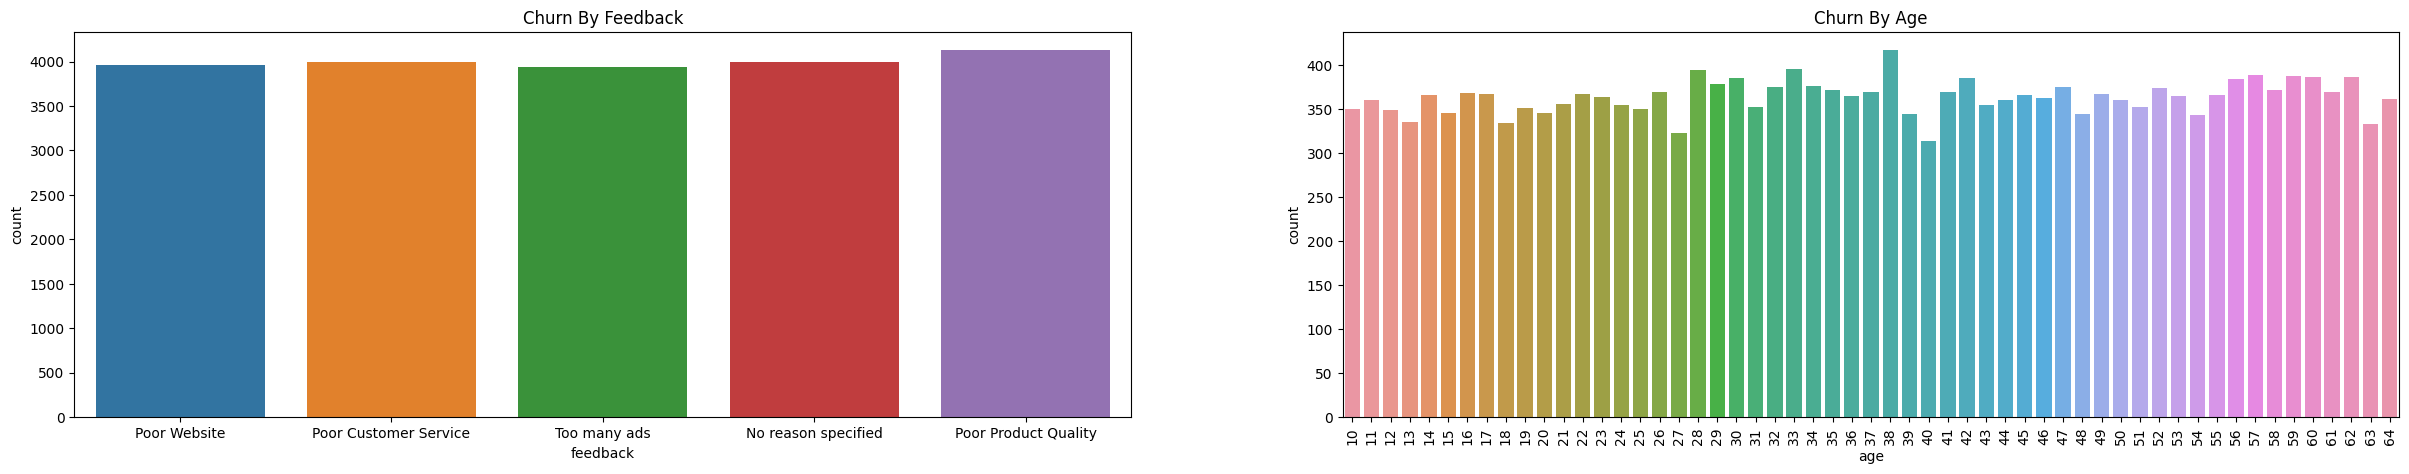

In [7]:
# mengecek churn pada kolom feedback dan age

plt.figure(figsize=(30,5))

plt.subplot(1, 2, 1)
sns.countplot(x=data_c['feedback'])
plt.title('Churn By Feedback')
plt.show

plt.subplot(1, 2, 2)
sns.countplot(x=data_c['age'])
plt.title('Churn By Age')
plt.xticks(rotation=90)
plt.show

- Dari chart diatas pelanggan yang churn kebanyakan mempunyai feedback yang negatif, dan untuk kolom age yan churn datanya tersebar secara merata

<function matplotlib.pyplot.show(close=None, block=None)>

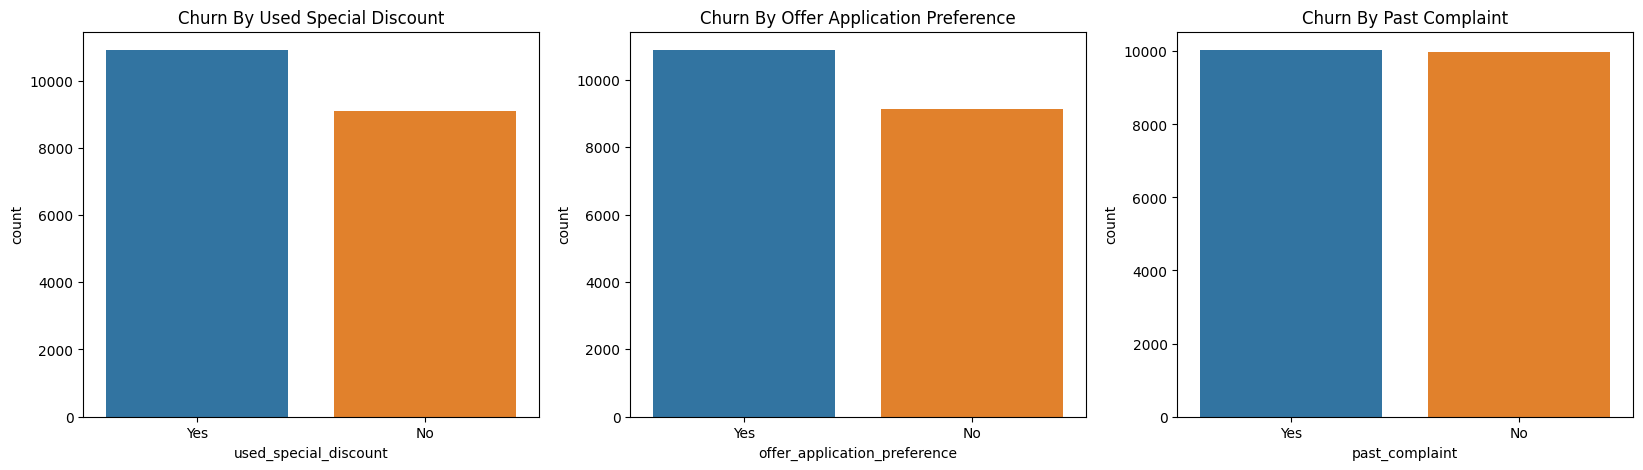

In [8]:
# mengecek churn pada kolom used special discount, Offer aplication preference, and past complaint

plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
sns.countplot(x=data_c['used_special_discount'])
plt.title('Churn By Used Special Discount')
plt.show

plt.subplot(1, 3, 2)
sns.countplot(x=data_c['offer_application_preference'])
plt.title('Churn By Offer Application Preference')
plt.show

plt.subplot(1, 3, 3)
sns.countplot(x=data_c['past_complaint'])
plt.title('Churn By Past Complaint')
plt.show

- Dari chart diatas walaupun menggunakan diskon masih saja pelanggan tetap mengalami churn, dan pelanggan yang sebelumnya pernah komplain dan tidak, masih sama saja tetap bisa mengalami churn

## Check Corelation All Columns With Heatmap

In [9]:
# memisahkan kolom numerik dan kolom kategorik
num_columnsEDA = data.select_dtypes(include=np.number)
cat_columnsEDA = data.select_dtypes(include=['object'])

# mengecek kolo kategorik
cat_columnsEDA.head(5)

,user_id,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,9f420209e7d129f3,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,Yes,Yes,Yes,No Information Available,Poor Website
1,ac6e97806267549e,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,Yes,No,Yes,No Information Available,Poor Customer Service
2,a6aa19b1580eed4e,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,Yes,No,Yes,No Information Available,Too many ads
3,aeee343277211c2f,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,No,Yes,No,Not Applicable,Too many ads
4,82448b5c8ce6390c,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,Yes,No,No,Not Applicable,Poor Product Quality


- Dari berabagi kolom kategorik diatas menurut saya ada 1 kolom kategorik yang memiliki tingkatan, yaitu kolom membership_category, jadi disini saya akan encoding kolom tersebut dengan ordinal encoder sebelum dicek korelasinya dengan melihat pada tabel heatmapnya nanti

<AxesSubplot: >

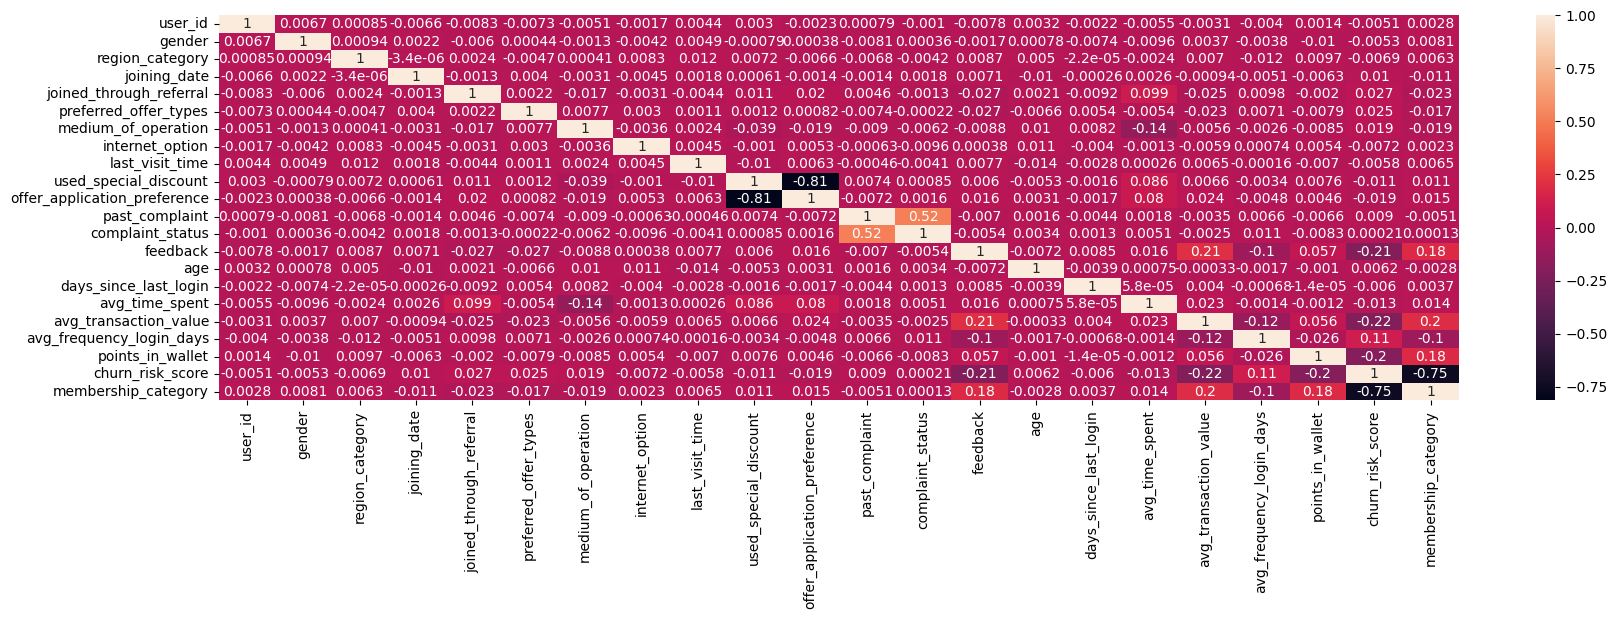

In [10]:
# menggunakan ordinal enncoder pada kolom membership category
ordinal_encode = ['membership_category']
encoder = OrdinalEncoder(categories=[['No Membership', 'Basic Membership', 'Silver Membership', 'Gold Membership', 'Premium Membership','Platinum Membership']])
cat_columnsEDA[ordinal_encode] = encoder.fit_transform(cat_columnsEDA[ordinal_encode])

# memasukan kolom yang sudah di encode ke kolom numerik
num_columnsEDA['membership_category']=cat_columnsEDA['membership_category']
cat_columnsEDA= cat_columnsEDA.drop('membership_category',axis=1)

# encoding kolom kategori dengan label encoder untuk dibuat heatmap
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_cat_encode = cat_columnsEDA.copy()
for col in data_cat_encode.select_dtypes(include='O').columns: data_cat_encode[col]=le.fit_transform(data_cat_encode[col])

# menggabungkan kolom kategori yang telah di encode dengan kolom numerik
df = pd.concat([data_cat_encode, num_columnsEDA], axis=1)

# melihat korelasi antara kolom dengan kolom target churn risk score
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True)


- Dari heatmap diatas yang mempunyai korelasi cukup tinggi dengan kolom target addalah kolom 'membership_category', 'feedback', 'avg_transaction_value', 'avg_frequency_login_days', dan 'points_in_wallet', dimana kolom-kolom tersebut mempunyai korelasi diatas 0,1 dan dari hasil tersebut maka saya akan menggunakan kolom-kolom tersebut sebagai fitur

# 5. Feature Engineering

## Feature Selection

In [11]:
# membuat dataset baru berisi fitur dan target

data1=data[['membership_category', 'feedback', 'avg_transaction_value', 'avg_frequency_login_days','points_in_wallet','churn_risk_score']]

## Splitting between `X` and `y`

In [12]:
# Splitting between X and y

X = data1.drop('churn_risk_score', axis=1)
y = data1['churn_risk_score']

In [13]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=26)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=26)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (23686, 5)
Val Size :  (5922, 5)
Test Size :  (7402, 5)


## Check Missing Value

In [14]:
# check missing value pada setiap kolom

data1.isnull().sum()

membership_category         0
feedback                    0
avg_transaction_value       0
avg_frequency_login_days    0
points_in_wallet            0
churn_risk_score            0
dtype: int64

- Karena pada data1, yaitu dataset yang berisi kolom fitur dan target yang akan diterapkan ke machine learning tidak ada missing value, maka pada data yang sudah di split juga akan tidak ada missing valuenya, jadi tidak perlu menangani missing valuenya

## Check Outlier

Karena kolom numerik pada data ada 3 jadi di sini saya mencoba mengecek outlier pada 3 kolom tersebut, dan saya hanya mengecek oulier yang berada pada X_train dimana data ini yang akan dijadikan sebagai fit, data lain tidak perlu di cek dikarenakan untuk mengetahui performa model jika dihadapkan dengan outlier

<AxesSubplot: xlabel='points_in_wallet'>

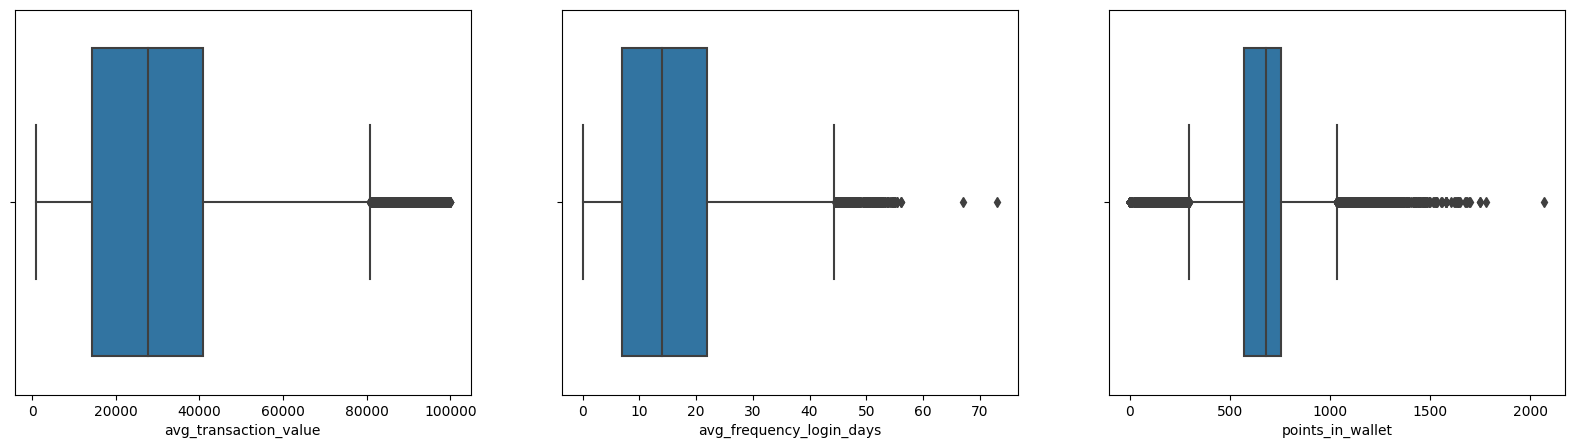

In [15]:
# mengecek outlier X_train dengan boxplot

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(x=X_train['avg_transaction_value'])

plt.subplot(1,3,2)
sns.boxplot(x=X_train['avg_frequency_login_days'])

plt.subplot(1,3,3)
sns.boxplot(x=X_train['points_in_wallet'])

- Paada chart diatas terlihat banyak sekali data yang dianggap sebgai outlier pada 3 kolom numerik diatas, namun data yang dianggap outlier tersebut menurut saya masih wajar nilainya, tidak terlalu ekstrim, masih ada kemungkinan bahwa pelanggan mempunyai kebiasaan seperti itu, jadi disini saya tidak akan menangani outliernya, di biarkan saja

## Get Numerical Columns and Categorical Columns

In [16]:
# Get Numerical Columns and Categorical Columns
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Categorical Columns :  ['membership_category', 'feedback']


## Pipeline Sklearn

In [17]:
# membuat pipeline
num_pipeline = make_pipeline(RobustScaler())
ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[['No Membership', 'Basic Membership', 'Silver Membership', 'Gold Membership', 'Premium Membership','Platinum Membership']]))
onehot_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat_ordinal', ordinal_pipeline, ['membership_category']),
    ('pipe_cat_onehot', onehot_pipeline, ['feedback'])
])

- Disini saya menggunakan robustscaler untuk menscaling data numeriknya karena ada banyak outlier, dan untuk kolom kategorik membership_category saya menggunakan ordinal encoder karena ada tingkatan dalam kolom tersebut, dan untuk kolom feedback saya gunakan onehot encoder karena tidak ada tingkatan dalam kolom tersebut

In [18]:
# fit and transform
X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)

X_train.shape

(23686, 13)

- Terdapat 13 kolom yang akan dijadikan input layer

## Pipeline Tensorflow

In [19]:
# membuat tensorflow pipeline

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(20)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(20)

- Dalam tensorflow pipeline saya menggunakan batch_size 20 untuk data train dan data validasi, serta data train di acak sebanyak data train itu sendiri

# 6. Sequential API

## Model Definition

In [20]:
# Create Sequential API

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_sequential = Sequential()
model_sequential.add(Dense(26, activation='elu', input_shape=(13,)))
model_sequential.add(Dense(14, activation='elu'))
model_sequential.add(Dense(1, activation='sigmoid'))

# Compile
model_sequential.compile(loss='binary_crossentropy', metrics=['accuracy'])
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                364       
                                                                 
 dense_1 (Dense)             (None, 14)                378       
                                                                 
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
Total params: 757
Trainable params: 757
Non-trainable params: 0
_________________________________________________________________


- Dalam base model disini saya menggunakan 2 hiden layer, dimana hiden layer 1 menggunakan 26 neuron, dan hiden layer 2 menggunakan 14 neuron, serta activation untuk hiden layernya adalah 'elu'. Input yang digunakan adalah 13 neuron berasal dari data preprosesing pada sklearn, dan output yang ingin dicapai adalah churn risk score, yaitu 0 atau 1

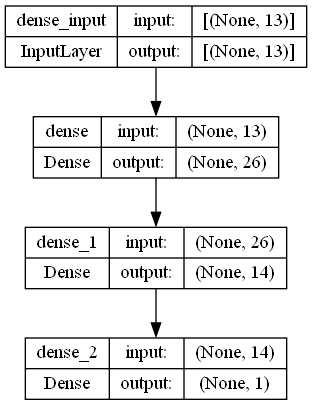

In [21]:
# Plot Layers
tf.keras.utils.plot_model(model_sequential, show_shapes=True)

## Model Training

Dalam train model saya mencoba menggunakan epochs = 30

In [22]:
# Train the Model

history_seq = model_sequential.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
1185/1185 [==============================] - 2s 1ms/step - loss: 0.3045 - accuracy: 0.8462 - val_loss: 0.2756 - val_accuracy: 0.8517
Epoch 2/30
1185/1185 [==============================] - 2s 1ms/step - loss: 0.2787 - accuracy: 0.8498 - val_loss: 0.2744 - val_accuracy: 0.8539
Epoch 3/30
1185/1185 [==============================] - 2s 1ms/step - loss: 0.2720 - accuracy: 0.8513 - val_loss: 0.2594 - val_accuracy: 0.8561
Epoch 4/30
1185/1185 [==============================] - 2s 2ms/step - loss: 0.2606 - accuracy: 0.8625 - val_loss: 0.2499 - val_accuracy: 0.8757
Epoch 5/30
1185/1185 [==============================] - 2s 1ms/step - loss: 0.2466 - accuracy: 0.8880 - val_loss: 0.2326 - val_accuracy: 0.9085
Epoch 6/30
1185/1185 [==============================] - 1s 1ms/step - loss: 0.2330 - accuracy: 0.9072 - val_loss: 0.2231 - val_accuracy: 0.9162
Epoch 7/30
1185/1185 [==============================] - 1s 1ms/step - loss: 0.2234 - accuracy: 0.9148 - val_loss: 0.2145 - val_accuracy:

## Model Evaluation

<AxesSubplot: >

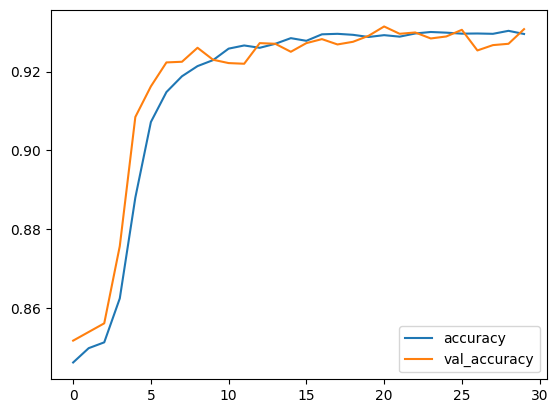

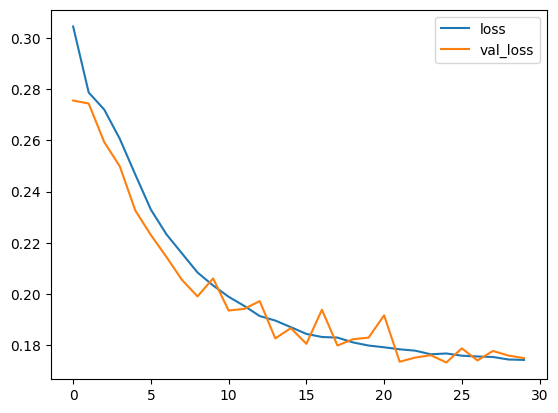

In [23]:
# Create DataFrame
history_seq_df = pd.DataFrame(history_seq.history)

# Plot Training Results
history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

- Dari hasil diatas model pada data train cukup baik, tidak overfit, mari kita coba model kedalam data test

In [24]:
# Model Evaluation of test-set

from sklearn.metrics import classification_report

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

232/232 [==============================] - 0s 991us/step
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3352
           1       0.94      0.92      0.93      4050

    accuracy                           0.92      7402
   macro avg       0.92      0.92      0.92      7402
weighted avg       0.92      0.92      0.92      7402



- Hasil model terhadap data test cukup baik pula, ini terlihat dengan accuracynya yang mencapai 92%

# 7. Functional API

## Model Definition

In [25]:
# Create Functional Model

from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model 

input_layer = Input(shape=(13,))
hidden_layer_1 = Dense(26, activation='elu')(input_layer)
hidden_layer_2 = Dense(14, activation='elu')(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         metrics='accuracy')
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 26)           364         ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 14)           378         ['dense_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 27)           0           ['input_1[0][0]',                
                                                                  'dense_4[0][0]']            

- Dalam model kedua ini saya menggunakan hiden layer yang masih sama pada model sebelumnya namun perbedaannya ada pada frameworknya, dimana pada model kali ini input di gabungkan dengan data hasil dari hiden layer keduanya, ini terkihat seperti pada gambar di bawah ini. Model agag sedikit kompleks, tidak seperti yang sebelumnya yang hanya simpel sesuai urutan

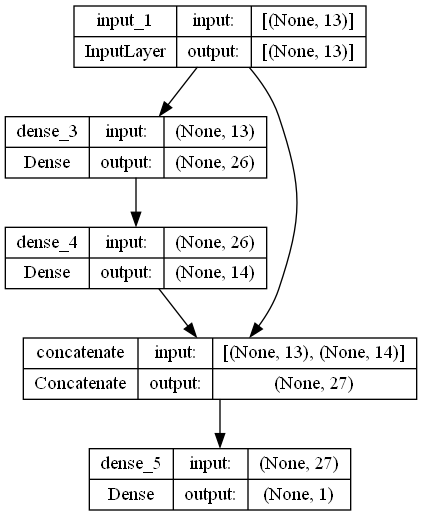

In [26]:
# Plot Layers
tf.keras.utils.plot_model(model_functional, show_shapes=True)

## Model Training

In [27]:
# Train the Model

history_func = model_functional.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
1185/1185 [==============================] - 2s 1ms/step - loss: 0.3074 - accuracy: 0.8444 - val_loss: 0.2829 - val_accuracy: 0.8495
Epoch 2/30
1185/1185 [==============================] - 2s 1ms/step - loss: 0.2846 - accuracy: 0.8483 - val_loss: 0.2784 - val_accuracy: 0.8514
Epoch 3/30
1185/1185 [==============================] - 2s 1ms/step - loss: 0.2822 - accuracy: 0.8483 - val_loss: 0.2851 - val_accuracy: 0.8479
Epoch 4/30
1185/1185 [==============================] - 2s 2ms/step - loss: 0.2793 - accuracy: 0.8486 - val_loss: 0.2745 - val_accuracy: 0.8507
Epoch 5/30
1185/1185 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.8484 - val_loss: 0.2602 - val_accuracy: 0.8492
Epoch 6/30
1185/1185 [==============================] - 2s 2ms/step - loss: 0.2535 - accuracy: 0.8776 - val_loss: 0.2352 - val_accuracy: 0.9070
Epoch 7/30
1185/1185 [==============================] - 2s 1ms/step - loss: 0.2283 - accuracy: 0.9160 - val_loss: 0.2182 - val_accuracy:

## Model Evaluation

<AxesSubplot: >

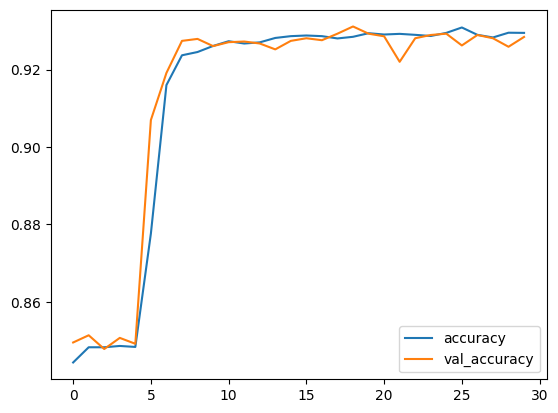

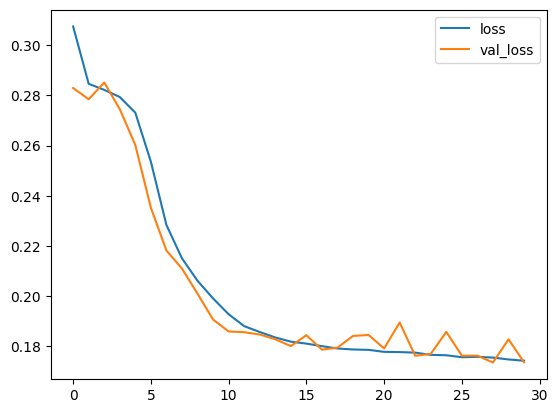

In [28]:
# Create DataFrame
history_func_df = pd.DataFrame(history_func.history)

# Plot Training Results
history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

- Model kedua (functional API) ini performanya cukup baik pada data train-set, tidak overfit,terlihat dari gambar diatas, dimana gap antara data train dan val nya cukup kecil, selanjutnya mari kita coba model kedalam data test set

In [29]:
# Evaluate Test-Set

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

232/232 [==============================] - 0s 768us/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3352
           1       0.93      0.93      0.93      4050

    accuracy                           0.92      7402
   macro avg       0.92      0.92      0.92      7402
weighted avg       0.92      0.92      0.92      7402



- Pada data test set performa model cukup bagus, dimana akurasinya mencapai 92% serta precission dan recallnya juga diatas 90% semua

# 8. Improvement Sequential API

## Model Definition

Untuk meningkatkan performa model sequential pada kasus kali ini saya akan mencoba mengubah activation nya, dimana pada base model saya menggunakan activation 'elu', disini saya menggunakan 'relu'. Selain itu saya juga menambahkan optimizer 'adam' pada model. Selebihnya masih sama untuk hiden layer dan neuronnya

In [30]:
# Create Sequential API

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation


model_sequential_2 = Sequential()

model_sequential_2.add(Dense(26, input_shape=(13,)))
model_sequential_2.add(Activation('relu'))

model_sequential_2.add(Dense(14))
model_sequential_2.add(Activation('relu'))


model_sequential_2.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential_2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                364       
                                                                 
 dense_1 (Dense)             (None, 14)                378       
                                                                 
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
Total params: 757
Trainable params: 757
Non-trainable params: 0
_________________________________________________________________


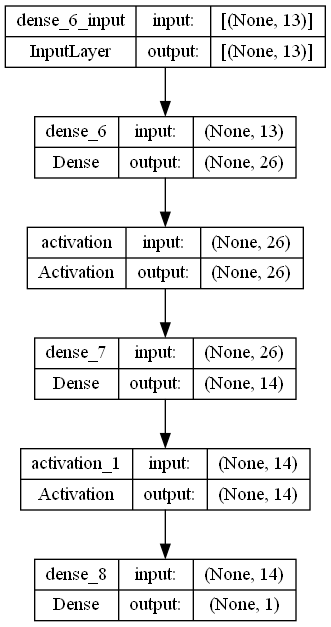

In [31]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential_2, show_shapes=True)

## Model Training

In [32]:
# melatih model

history_seq_2 = model_sequential_2.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
1185/1185 [==============================] - 2s 1ms/step - loss: 0.3117 - accuracy: 0.8469 - val_loss: 0.2492 - val_accuracy: 0.8784
Epoch 2/30
1185/1185 [==============================] - 1s 1ms/step - loss: 0.2303 - accuracy: 0.9032 - val_loss: 0.2085 - val_accuracy: 0.9176
Epoch 3/30
1185/1185 [==============================] - 1s 1ms/step - loss: 0.2024 - accuracy: 0.9229 - val_loss: 0.1913 - val_accuracy: 0.9242
Epoch 4/30
1185/1185 [==============================] - 2s 1ms/step - loss: 0.1918 - accuracy: 0.9251 - val_loss: 0.1888 - val_accuracy: 0.9271
Epoch 5/30
1185/1185 [==============================] - 2s 2ms/step - loss: 0.1881 - accuracy: 0.9274 - val_loss: 0.1831 - val_accuracy: 0.9281
Epoch 6/30
1185/1185 [==============================] - 2s 1ms/step - loss: 0.1832 - accuracy: 0.9277 - val_loss: 0.1823 - val_accuracy: 0.9282
Epoch 7/30
1185/1185 [==============================] - 1s 1ms/step - loss: 0.1809 - accuracy: 0.9283 - val_loss: 0.1841 - val_accuracy:

## Model Evaluation

<AxesSubplot: >

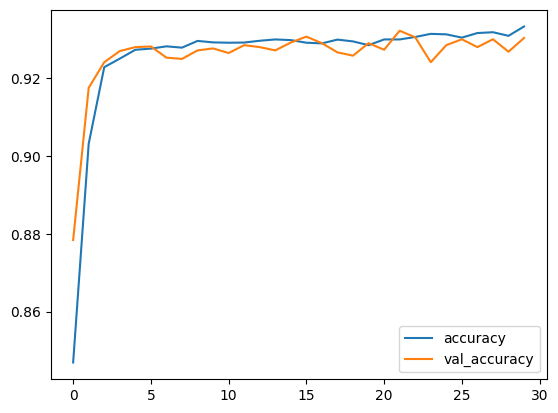

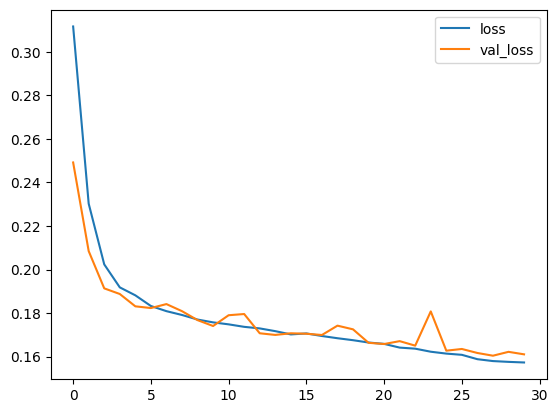

In [33]:
# Create DataFrame
history_seq_df_2 = pd.DataFrame(history_seq_2.history)

# Plot Training Results
history_seq_df_2[['accuracy', 'val_accuracy']].plot()
history_seq_df_2[['loss', 'val_loss']].plot()

- Model pada data trai massih bagus, tidak overfit

In [34]:
# Model Evaluation of test-set

from sklearn.metrics import classification_report

y_pred_seq_2 = model_sequential_2.predict(X_test)
y_pred_seq_2 = np.where(y_pred_seq_2 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq_2))

232/232 [==============================] - 0s 836us/step
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3352
           1       0.92      0.95      0.93      4050

    accuracy                           0.93      7402
   macro avg       0.93      0.92      0.93      7402
weighted avg       0.93      0.93      0.93      7402



- Pada data test ada kenaikan pada akurasinya menjadi 93%, dimana seblumnya dengan activation 'elu' dan tanpa optimizer 'adam' akurasinya hanya 92%

# 9. Improvement Functional API

## Model Definition

- Untuk mencoba menaikan performa functional API disini saya tidak merubah hiden layer dan neuronnya, saya hanya menambhakan optimizer 'adam' saja pada model, selebihnya masih sama.

In [35]:
# model definition

from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

input_layer = Input(shape=(13,))
hidden_layer_1 = Dense(26)(input_layer)
hidden_layer_1 = Activation('elu')(hidden_layer_1)

hidden_layer_2 = Dense(14)(hidden_layer_1)
hidden_layer_2 = Activation('elu')(hidden_layer_2)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional_2 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional_2.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 26)           364         ['input_2[0][0]']                
                                                                                                  
 activation_2 (Activation)      (None, 26)           0           ['dense_9[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 14)           378         ['activation_2[0][0]']           
                                                                                            

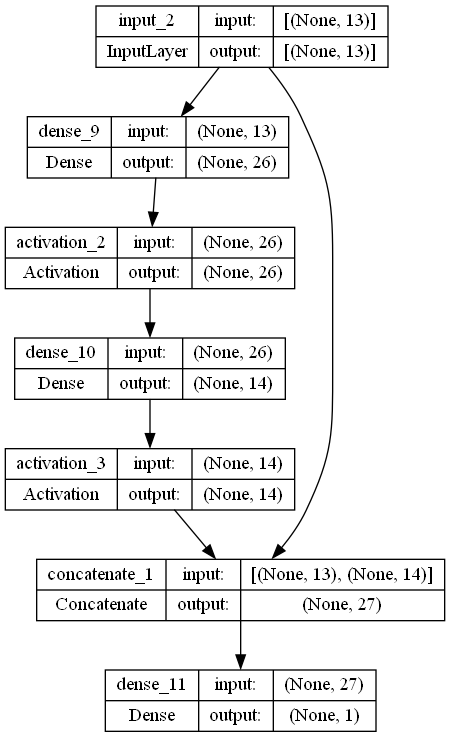

In [36]:
# Plot Layers
tf.keras.utils.plot_model(model_functional_2, show_shapes=True)

## Model Training

In [37]:
# Train the Model

history_func_2 = model_functional_2.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
1185/1185 [==============================] - 2s 1ms/step - loss: 0.3234 - accuracy: 0.8346 - val_loss: 0.2826 - val_accuracy: 0.8507
Epoch 2/30
1185/1185 [==============================] - 2s 1ms/step - loss: 0.2817 - accuracy: 0.8481 - val_loss: 0.2752 - val_accuracy: 0.8511
Epoch 3/30
1185/1185 [==============================] - 1s 1ms/step - loss: 0.2733 - accuracy: 0.8497 - val_loss: 0.2638 - val_accuracy: 0.8539
Epoch 4/30
1185/1185 [==============================] - 1s 1ms/step - loss: 0.2509 - accuracy: 0.8806 - val_loss: 0.2327 - val_accuracy: 0.9022
Epoch 5/30
1185/1185 [==============================] - 2s 1ms/step - loss: 0.2275 - accuracy: 0.9099 - val_loss: 0.2180 - val_accuracy: 0.9107
Epoch 6/30
1185/1185 [==============================] - 2s 1ms/step - loss: 0.2127 - accuracy: 0.9177 - val_loss: 0.2037 - val_accuracy: 0.9191
Epoch 7/30
1185/1185 [==============================] - 2s 2ms/step - loss: 0.2014 - accuracy: 0.9237 - val_loss: 0.1925 - val_accuracy:

## Model Evaluation

<AxesSubplot: >

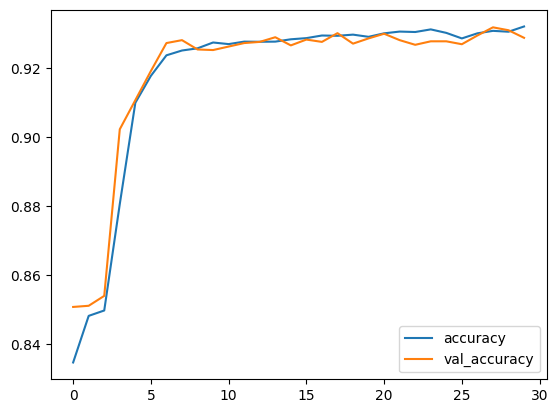

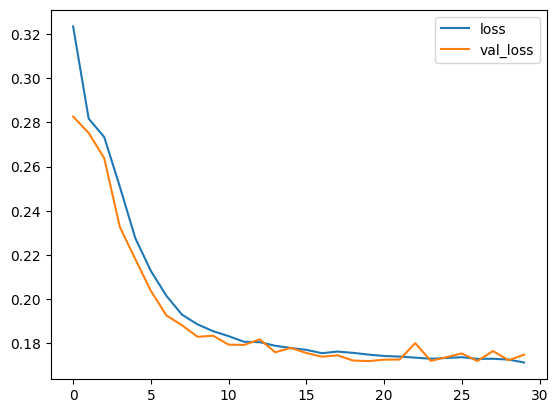

In [38]:
# Create DataFrame
history_func_df_2 = pd.DataFrame(history_func_2.history)

# Plot Training Results
history_func_df_2[['accuracy', 'val_accuracy']].plot()
history_func_df_2[['loss', 'val_loss']].plot()

- Performa model pada data train setelah ditambahkan optimizer cukup baik, terlihat dari ga,bar diatas dimana garis biru dengann oren saling berhimpitan, yang berarti ini tidak overfit

In [39]:
# Evaluate Test-Set

y_pred_func_2 = model_functional_2.predict(X_test)
y_pred_func_2 = np.where(y_pred_func_2 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func_2))

232/232 [==============================] - 0s 777us/step
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3352
           1       0.93      0.94      0.93      4050

    accuracy                           0.93      7402
   macro avg       0.93      0.92      0.92      7402
weighted avg       0.93      0.93      0.93      7402



- Pada data test pun performa model cukup baik, dimana hanya dengan ditambahkan optimizer 'adam' pada model akurasinya naik menjadi 93% dimana yanng seblumnya hanya 92%

# 10. Model Saving

In [40]:
# Save Pipeline Sklearn

import pickle

with open('final_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

- Berdasarkan menjabaran model diatas saya mengambil kesimpulan bahwa model functional yang ditambahkan optimizer yang akan saya gunakan pada kasus kali ini

In [41]:
# Summary of Model Improvement Functional

model_functional_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 26)           364         ['input_2[0][0]']                
                                                                                                  
 activation_2 (Activation)      (None, 26)           0           ['dense_9[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 14)           378         ['activation_2[0][0]']           
                                                                                            

In [42]:
# Freeze Model

model_sequential_2.trainable = False
model_sequential_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 26)                364       
                                                                 
 activation (Activation)     (None, 26)                0         
                                                                 
 dense_7 (Dense)             (None, 14)                378       
                                                                 
 activation_1 (Activation)   (None, 14)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 15        
                                                                 
Total params: 757
Trainable params: 0
Non-trainable params: 757
_________________________________________________________________


In [44]:
# Save ANN Model

model_sequential_2.save('churn_model.h5')

# 11. Kesimpulan

- Dalam kasus kali ini model ANN dengan Functional API dapat memprediksi dengan baik churn risknya, bahkan akurasinya memcapai 93%. Tentu model ini cukup baik untuk digunakan dalam memprediksi pelanggan pada bulan bulan selanjutnya apakah akan churn atau tidak. Dari hasil prediksi itu bisa di ambil sikap bagaimana cara mengatasi pelanngan agar tidak churn. Namun pada EDA agak cukup membingungkann karakteristik pelanggaan yang churn ini, dimana mereka sudah diberikan promo dan banyak yang menggunakan promo tersebut tapi masih tetap saja churn, ini sepertinya memang produknya yang perlu ditingkatkan lagi kualitsnya. Dilihat dari feedback juga yang churn kebanyakan memberikan feedback yang negatif, mulai dari pelayanan yang kurang, produk yang kurang, dll. Ini mungkin bisa jadi bahan evaluasi untuk perusahan dalam hal pelayanan dan kualitas produk.